# Lab | Regression Analysis

### Import libraries here:

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Challenge 1
- I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. 
- In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

## Creating dataframe
Use this command to create the dataframe.
```python
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
```

In [2]:
# Your code here
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [3]:
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


## Plot your data
- Use  `sns.scatterplot` to plot `Age` vs `Tardies` 

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

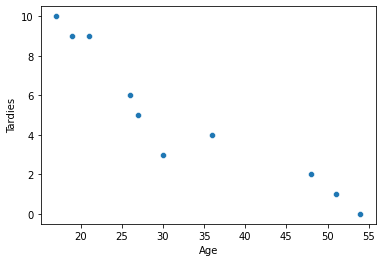

In [4]:
# Your code here
sns.scatterplot(data=student_data, x="Age", y="Tardies")

- You can also use `sns.pairplot()`.
- This plot the pairwise relationships in a dataset.

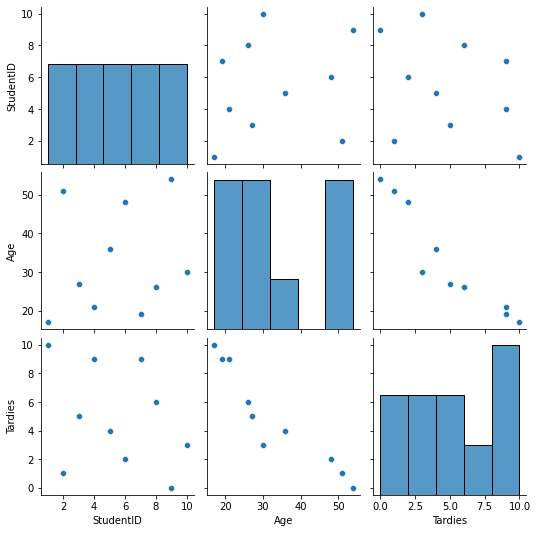

In [5]:
# Your code here
sns.pairplot(data=student_data)

- Do you see a trend?
- Can you make any hypotheses about the relationship between age and number of tardies?

It seems that the higher the age the lower is the tardies.

## Covariance and correlation

- Calculate the covariance and correlation of the variables. 
- Use `.cov()` and  `.corr()`.
- What is the difference between these two measures?

In [6]:
# Your code here
student_data.cov()

,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


In [7]:
student_data.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


Covariance is a non standardize value that can varies from -infinity to +infinity, while correlation is standardized and varies from -1 to 1.

## Linear regression

- Build a linear regression model for this data. 
- You can use scikit-learn library.
```python
from sklearn.linear_model import LinearRegression
```

### Select variables
- Select you `X` and `y` variables.
- `X` will be your independent variable. **"Age"**
- `y` will be your dependent variable. **"Tardies"**

In [8]:
# Your code here
x = student_data[['Age']]
y = student_data['Tardies']

### Train and test
- Split the data into train and test:
- `X_train`, `X_test`, `y_train`, `y_test`

In [9]:
# Your code here
X_train = x
X_test = x
Y_train = y
Y_test = y

### Modeling
- Instantiate the LinearRegression class

In [10]:
# Your code here
model = LinearRegression()

### Fit the model 
- Fit the model, the algorithm will learn about the data pattern

In [11]:
# Your code here
model.fit(X_train, Y_train)

LinearRegression()

### Prediction
- Predict the y_test that we splitted.
- Save in a variable called `y_pred_test`

In [12]:
# Your code here
y_pred_test = model.predict(X_test)
y_pred_test

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

### Evaluate (test)
- Use the metrics below to evaluate your model and predict data.
- Use the y_test and y_pred_test
```python
from sklearn.metrics import mean_squared_error, r2_score
```

In [13]:
# Your code here
mean_squared_error(y_true=Y_test, y_pred=y_pred_test)

1.3319201847356268

In [14]:
r2_score(y_true=Y_test, y_pred=y_pred_test)

0.8820265558250109

### Coefficient and intercept
- Use `model.coef_` and `model.intercept_` to return both values.
- Can you interpret the values?

In [15]:
# Your code here
model.coef_, model.intercept_

(array([-0.24282077]), 12.888803363135768)

- This is the linear regression equation:
__y= mX + b__
> * y: target variable
> * X: feature variables
- coefficient of -0.24: it means that for every unit of change in X (age), the change in y (tardie) is about 24% in a negative direction. 
- In other words: for every year of increasing in age, it will represent a decrease of 24% in tardies.

### Visualize the results
- Use the model that you created to predict the tardies. You will use `X`
- Include predictable tardies into the dataframe.

In [16]:
# Your code here
student_data['predict_tardies'] = model.coef_*student_data.Age + model.intercept_
student_data

,StudentID,Age,Tardies,predict_tardies
0,1,17,10,8.760850
1,2,51,1,0.504944
2,3,27,5,6.332643
3,4,21,9,7.789567
4,5,36,4,4.147256
5,6,48,2,1.233406
6,7,19,9,8.275209
7,8,26,6,6.575463
8,9,54,0,-0.223518
9,10,30,3,5.604180


### Plot
- You can use the code below:
- Add the ticks and labels.
```python
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
```

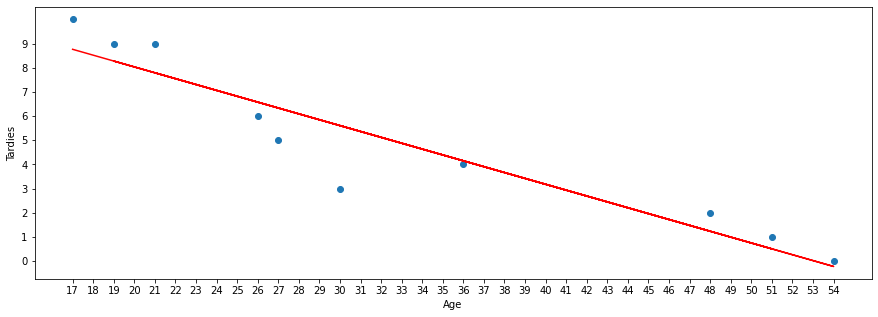

In [17]:
# Your code here
plt.figure(figsize=(15,5))
plt.scatter(x, y)
plt.plot(x, student_data['predict_tardies'], color='red')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.yticks(np.arange(0, 10, step=1))
plt.xticks(np.arange(17, 55, step=1))
plt.show()

_______________________________________

# Challenge 2

- In this challenge you will use `vehicles.csv` dataset.
- This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions.
- The goal of this exercise is to predict `vehicles CO2 emissions` based on several independent variables. 

### Read csv file

In [18]:
# Your code here
df_vehicles = pd.read_csv('data/vehicles.csv')
df_vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


### Correlations
- Use the variables `Year`, `Cylinders`, `Fuel Barrels/Year`, `Combined MPG`, and `Fuel Cost/Year`.
- Plot the pairwise relationships between columns. You can use `sns.pairplot()`
- Calculate the correlations between each of these variables and the outcome. You can use `.corr()`.
- Analyze which variable is the most important in determining `CO2 Emission Grams/Mile`

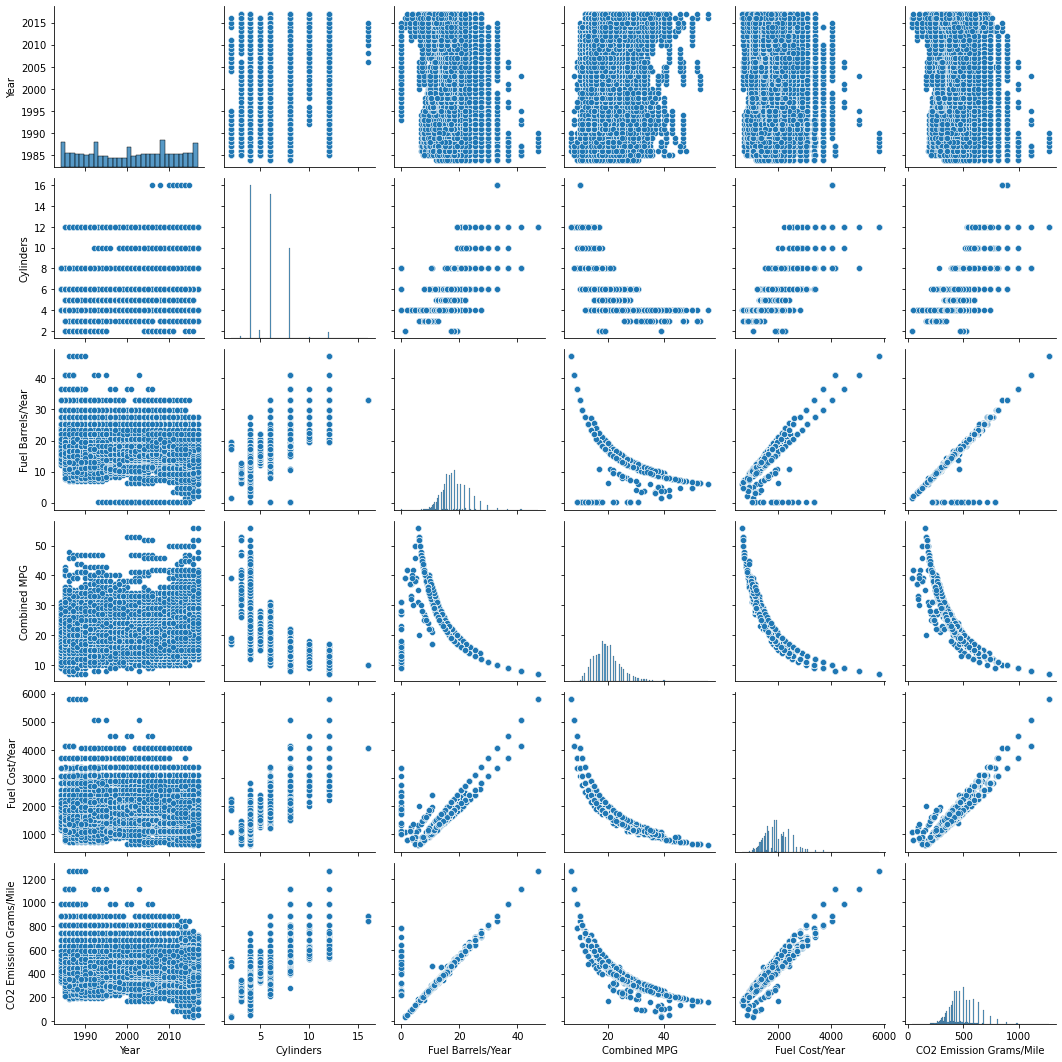

In [19]:
# Your code here
sns.pairplot(data=df_vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']])

### Linear regression
- Build a linear regression to predict the `CO2 Emission Grams/Mile`

In [20]:
model2 = LinearRegression()

In [21]:
# Your code here
vehicles_n = df_vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
vehicles_n.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [22]:
X = vehicles_n.drop('CO2 Emission Grams/Mile', axis=1)
y = vehicles_n['CO2 Emission Grams/Mile']
model.fit(X, y)

LinearRegression()

In [24]:
model.coef_, model.intercept_

(array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948]),
 769.8882836465212)

### Predicting (X_test)

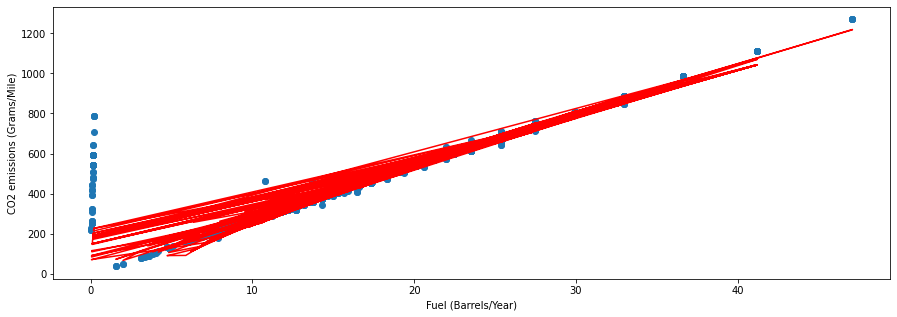

In [29]:
# Your code here

CO2pred = model.predict(X)

plt.figure(figsize=(15,5))
plt.scatter(df_vehicles['Fuel Barrels/Year'], y)
plt.plot(df_vehicles['Fuel Barrels/Year'], CO2pred, color='red')
plt.xlabel('Fuel (Barrels/Year)')
plt.ylabel('CO2 emissions (Grams/Mile)')
#plt.yticks(np.arange(0, 10, step=1))
#plt.xticks(np.arange(17, 55, step=1))
plt.show()

### Evaluate
- Use `mean_squared_error()` and `r2_score()`.
- Use variables `y_test` and `y_pred`

In [30]:
# Your code here
mean_squared_error(y, CO2pred)

271.1196550702996

In [31]:
r2_score(y, CO2pred)

0.9808734920269122